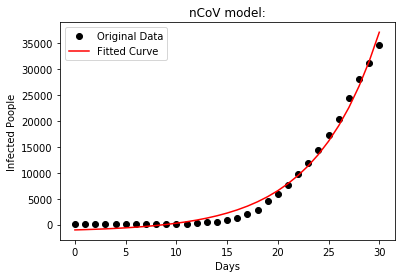

People = 333.720 * e^(0.158 * Day) + -1352


In [15]:
# get some info about nCoV

import pandas as pd

URL = 'https://en.wikipedia.org/wiki/Timeline_of_the_2019%E2%80%9320_Wuhan_coronavirus_outbreak'

df = pd.read_html(URL)[2].iloc[:-1].fillna(method='bfill')

df.columns = df.columns.droplevel(level=0)

convert_dict = {'Date(CST)': 'datetime64[ns]',
                'Confirmed(cumulative)': int,
                'Deaths(cumulative)': int,
                'Recovered(cumulative)': int,
                }

df = df[convert_dict.keys()].astype(convert_dict)

# model

from scipy.optimize import curve_fit

figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

x = df.index.values  # df['Date(CST)'].astype(np.int64).values
y = df['Confirmed(cumulative)'].values

popt, pcov = curve_fit(lambda t, a, b, c: a*np.exp(b*t)+c,  x,  y)

def func(x, a, b, c):
    return a*np.exp(b*x)+c

# plot

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

%matplotlib inline

plt.figure()
plt.plot(x, y, 'ko', label="Original Data")
plt.plot(x, func(x, *popt), 'r-', label="Fitted Curve")
plt.xlabel('Days')
plt.ylabel('Infected Poople')
plt.title('nCoV model:')
plt.legend()
plt.show()

print('People = {:.3f} * e^({:.3f} * Day) + {:.0f}'.format(*popt))